# Fandango Movie Rating Bias Analysis
**Goal:** In this project, we analyze Fandango's movie ratings to determine if they are inflated compared to other rating sites (Rotten Tomatoes, Metacritic, and IMDb).

## 1. Data Loading and Inspection
We start by importing the necessary libraries and loading the Fandango dataset to understand its structure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

In [2]:
fandango = pd.read_csv("data/fandango_scrape.csv")
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [3]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [4]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## 2. Analyzing Fandango's Displayed Stars vs. Actual Ratings
Fandango stores two values: `STARS` (what is displayed) and `RATING` (the actual hidden value). We investigate if there is a discrepancy between them.

<Axes: xlabel='RATING', ylabel='VOTES'>

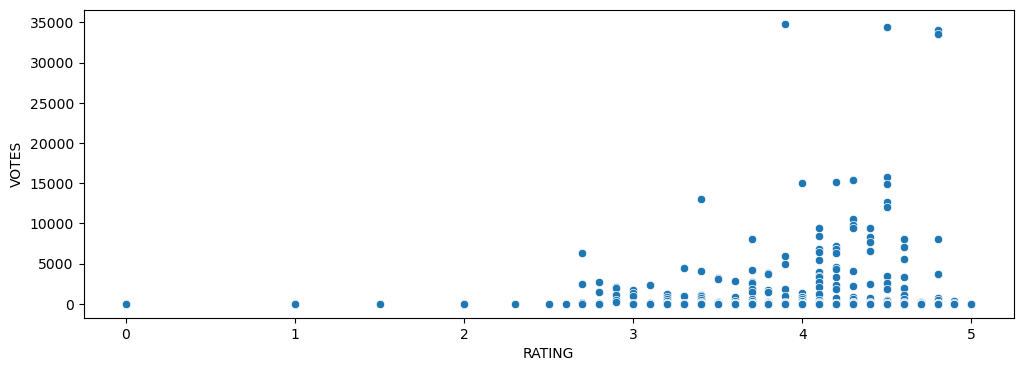

In [5]:
fig = plt.figure(figsize=(12,4))
sns.scatterplot(x='RATING',y='VOTES',data=fandango)

In [6]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [7]:
fandango['YEAR'] = fandango['FILM'].str[-5:-1]
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [8]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_25556\1014424396.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='YEAR',data=fandango,palette='Set1')


<Axes: xlabel='YEAR', ylabel='count'>

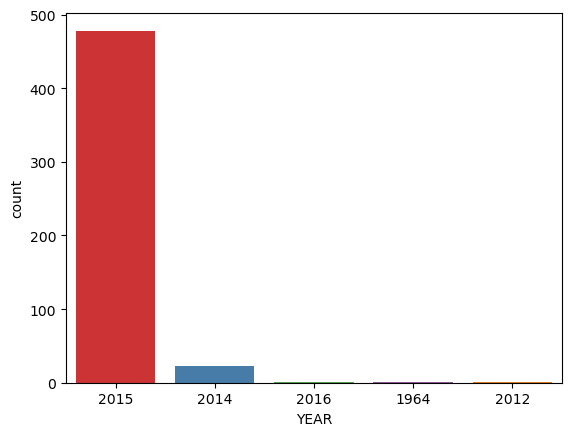

In [9]:
sns.countplot(x='YEAR',data=fandango,palette='Set1')

In [10]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [11]:
no_votes = fandango['VOTES']==0 
no_votes.sum()

np.int64(69)

In [12]:
fan_reviewed = fandango[fandango['VOTES']>0]

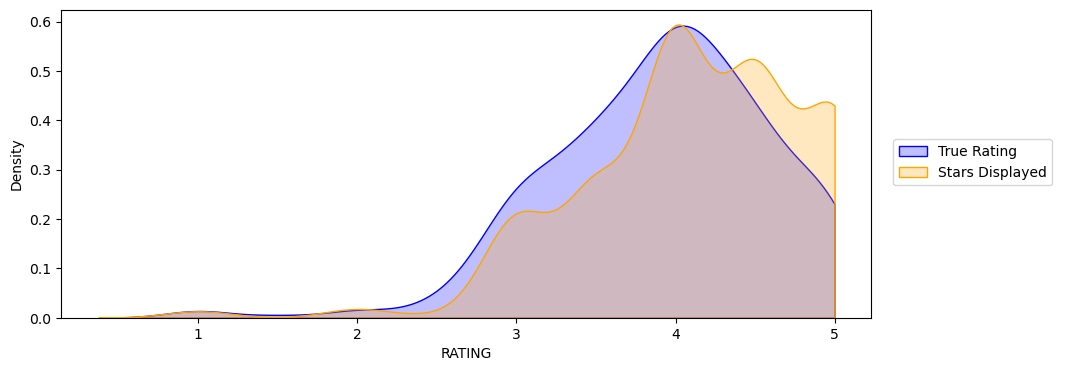

In [13]:
fig = plt.figure(figsize=(12,4))
plt.subplots_adjust(right=0.8)
sns.kdeplot(x='RATING',data=fan_reviewed,fill=True,color='blue',clip=[0,5],label='True Rating')
sns.kdeplot(x='STARS',data=fan_reviewed,fill=True,color='orange',clip=[0,5],label='Stars Displayed')
fig.legend(loc=(0.83, 0.5))

### Visualizing the Rounding Discrepancy
We plot the count of `STARS` versus `RATING` to see if the scores are being systematically rounded up.

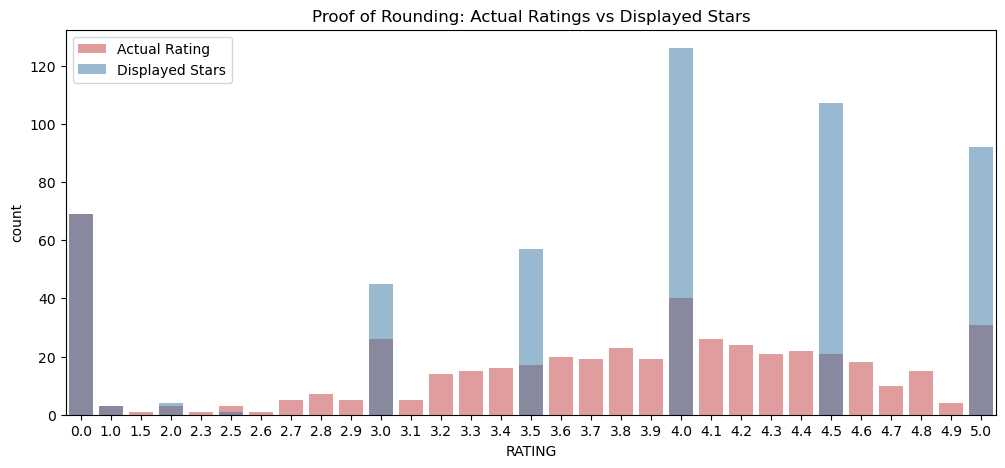

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(data=fandango, x='RATING', color='#d62728', alpha=0.5, label='Actual Rating')
sns.countplot(data=fandango, x='STARS', color='#1f77b4', alpha=0.5, label='Displayed Stars')
plt.legend(loc='upper left')
plt.title("Proof of Rounding: Actual Ratings vs Displayed Stars")
plt.show()

In [15]:
fan_reviewed['STARS_DIFF'] = (fan_reviewed['STARS'] - fan_reviewed['RATING']).round(1)
fan_reviewed

C:\Users\hp\AppData\Local\Temp\ipykernel_25556\1407511209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = (fan_reviewed['STARS'] - fan_reviewed['RATING']).round(1)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


C:\Users\hp\AppData\Local\Temp\ipykernel_25556\2882789049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STARS_DIFF',data=fan_reviewed,palette='Set1')


<Axes: xlabel='STARS_DIFF', ylabel='count'>

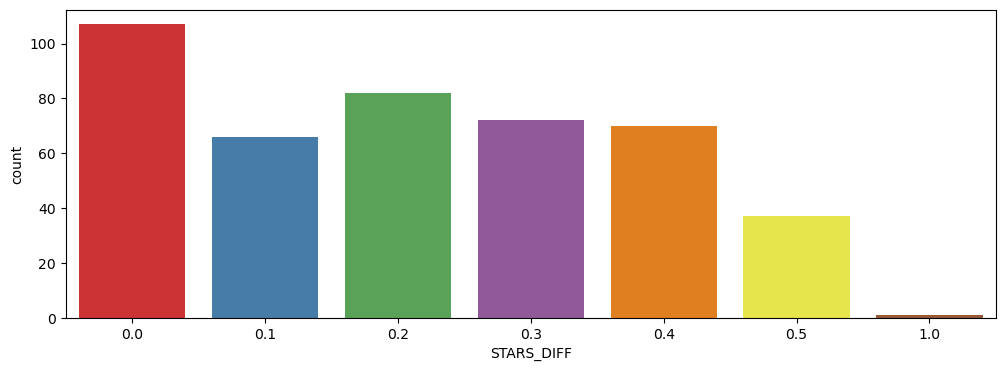

In [16]:
fig = plt.figure(figsize=(12,4))
sns.countplot(x='STARS_DIFF',data=fan_reviewed,palette='Set1')

In [17]:
one_star_diff = fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]
one_star_diff

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## 3. Comparing with Other Review Sites
To determine if Fandango is biased, we need to compare it against competitors. We load data from Rotten Tomatoes, Metacritic, and IMDb.

In [18]:
all_sites = pd.read_csv("data/all_sites_scores.csv")

In [19]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [20]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [21]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes: Critics vs. Users
Before comparing to Fandango, we check the relationship between professional critics and general users on Rotten Tomatoes.

(0.0, 100.0)

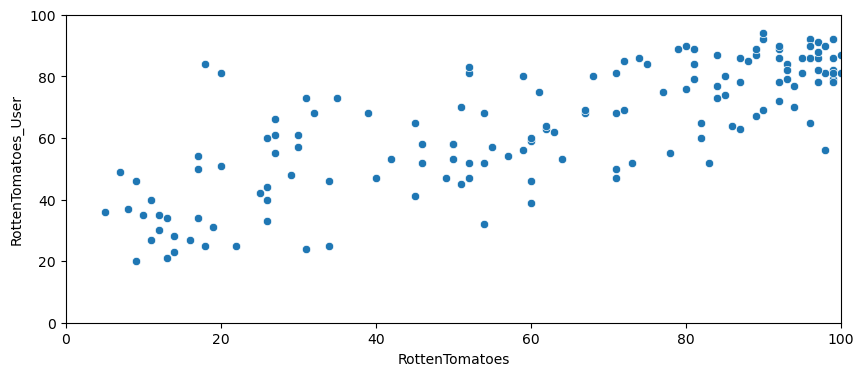

In [22]:
fig = plt.figure(figsize=(10,4))
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data=all_sites)
plt.xlim(0, 100)
plt.ylim(0, 100)

In [23]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [24]:
all_sites['Rotten_Diff'].abs().mean()

np.float64(15.095890410958905)

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

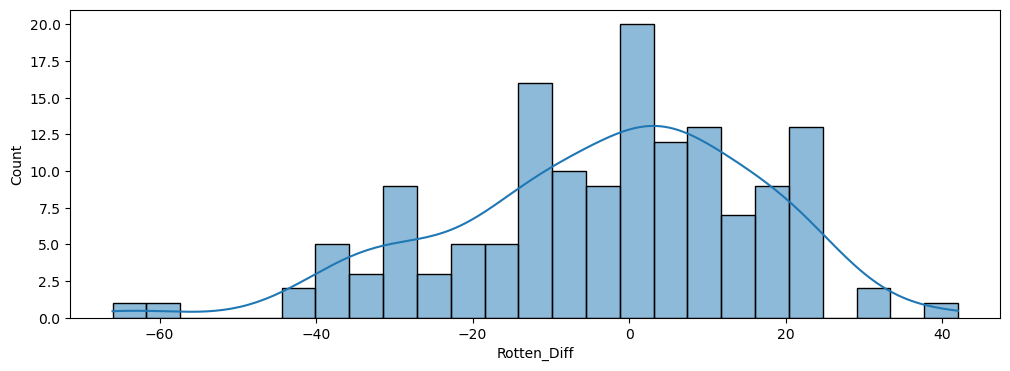

In [25]:
fig = plt.figure(figsize=(12,4))
sns.histplot(x='Rotten_Diff',data=all_sites,kde=True,bins=25)

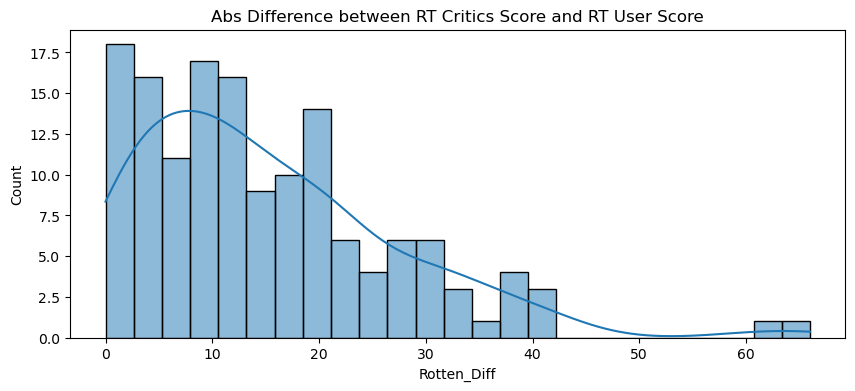

In [26]:
plt.figure(figsize=(10,4))
sns.histplot(x=all_sites['Rotten_Diff'].abs(), kde=True, bins=25)
plt.title("Abs Difference between RT Critics Score and RT User Score")
plt.show()

In [27]:
print("Users Love but Critics Hate")
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [28]:
print("Critics love, but Users Hate")
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


(0.0, 10.0)

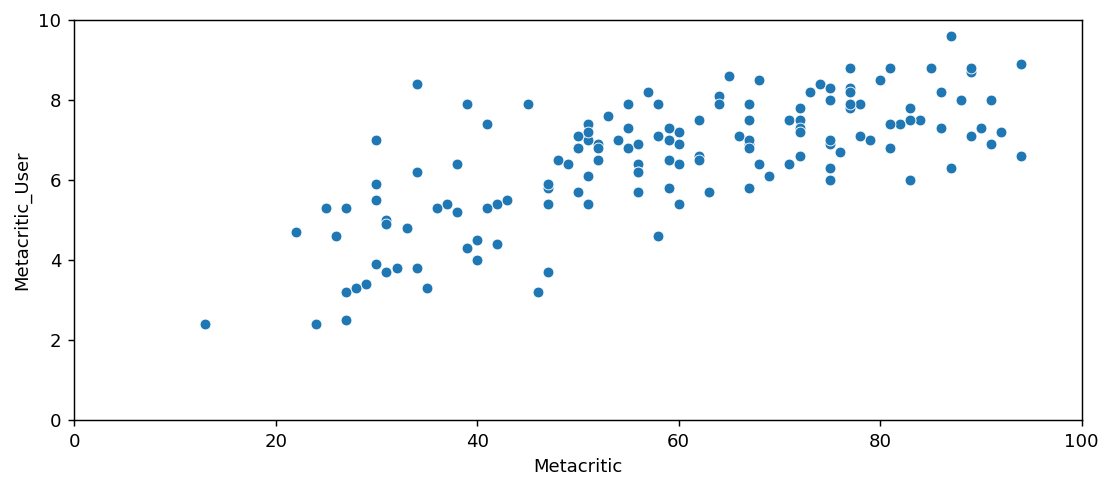

In [29]:
fig = plt.figure(figsize=(10,4),dpi=130)
sns.scatterplot(x='Metacritic',y='Metacritic_User',data=all_sites)
plt.xlim(0,100)
plt.ylim(0,10)

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

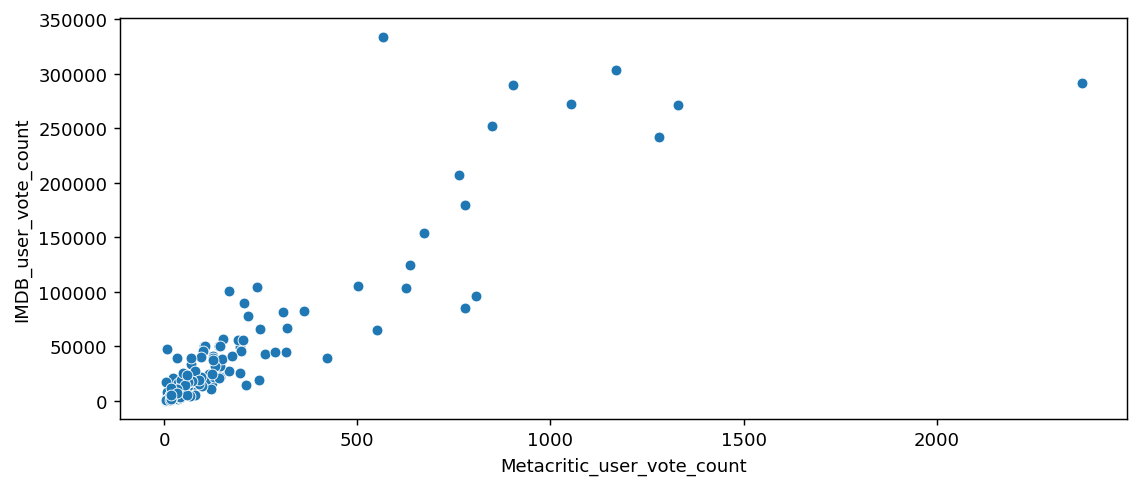

In [30]:
fig = plt.figure(figsize=(10,4),dpi=130)
sns.scatterplot(x='Metacritic_user_vote_count',y='IMDB_user_vote_count',data=all_sites)

In [31]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [32]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## 4. Merging and Normalizing Data
We perform an inner join to merge the datasets on the `FILM` column. Since different sites use different scales (0-10, 0-100, 0-5), we normalize all ratings to a 0-5 scale for a fair comparison.

In [33]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [35]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [36]:
df.describe()

,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


In [37]:
df['RT_Norm'] = np.round(df['RottenTomatoes'] / 20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User'] / 20, 1)
df['Meta_Norm'] = np.round(df['Metacritic'] / 20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User'] / 2, 1)
df['IMDB_Norm'] = np.round(df['IMDB'] / 2, 1)

In [38]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [39]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [40]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


## 5. Analysis: Comparing Distributions
We now visualize the distribution of ratings across all sites. If Fandango is unbiased, its shape should resemble the other sites.

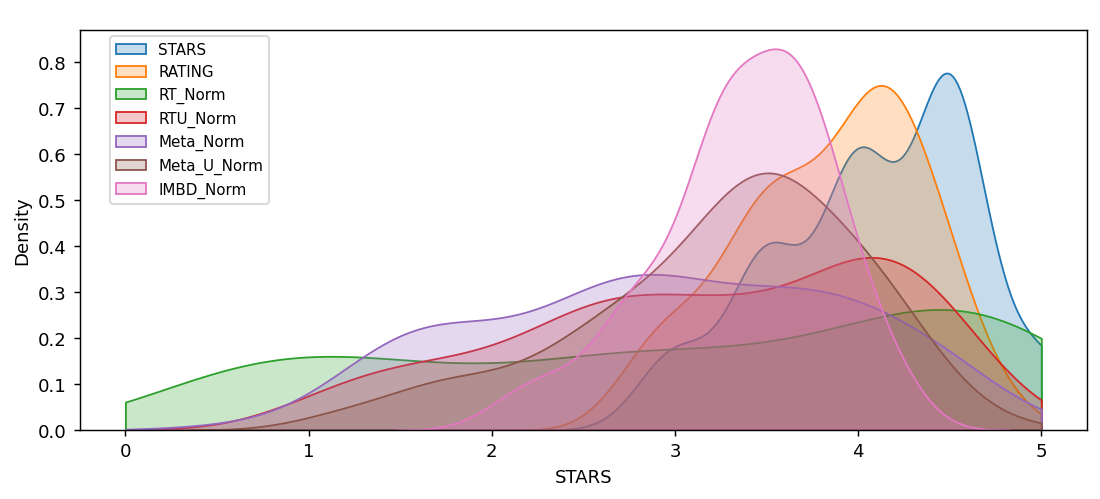

In [41]:
fig = plt.figure(figsize=(10,4),dpi=130)
sns.kdeplot(x='STARS',data=norm_scores,fill=True,clip=[0,5],label='STARS')
sns.kdeplot(x='RATING',data=norm_scores,fill=True,clip=[0,5],label='RATING')
sns.kdeplot(x='RT_Norm',data=norm_scores,fill=True,clip=[0,5],label='RT_Norm')
sns.kdeplot(x='RTU_Norm',data=norm_scores,fill=True,clip=[0,5],label='RTU_Norm')
sns.kdeplot(x='Meta_Norm',data=norm_scores,fill=True,clip=[0,5],label='Meta_Norm')
sns.kdeplot(x='Meta_U_Norm',data=norm_scores,fill=True,clip=[0,5],label='Meta_U_Norm')
sns.kdeplot(x='IMDB_Norm',data=norm_scores,fill=True,clip=[0,5],label='IMBD_Norm')
fig.legend(loc=(0.1,0.59),fontsize='small')

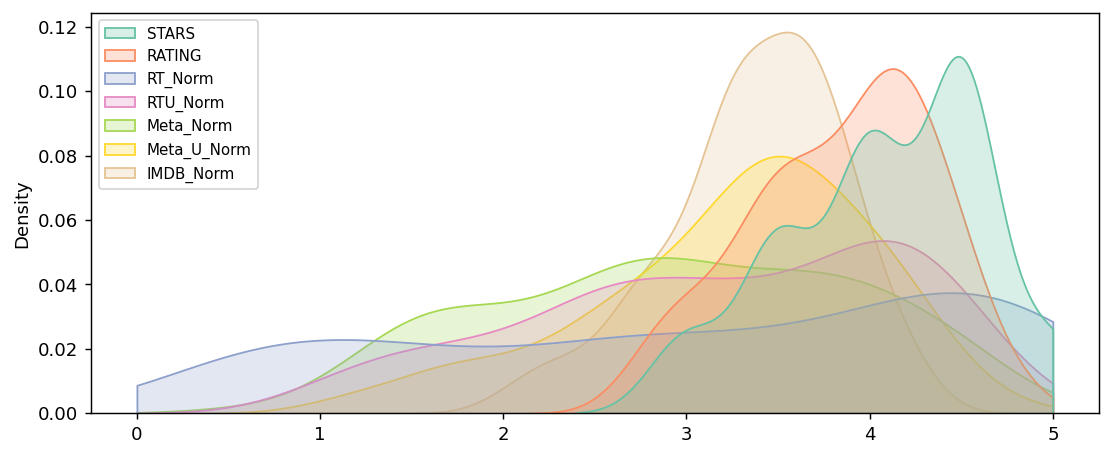

In [42]:
fig = plt.figure(figsize=(10,4), dpi=130)
sns.kdeplot(data=norm_scores, fill=True, clip=[0,5], palette='Set2')
sns.move_legend(plt.gca(), "upper left", fontsize='small')

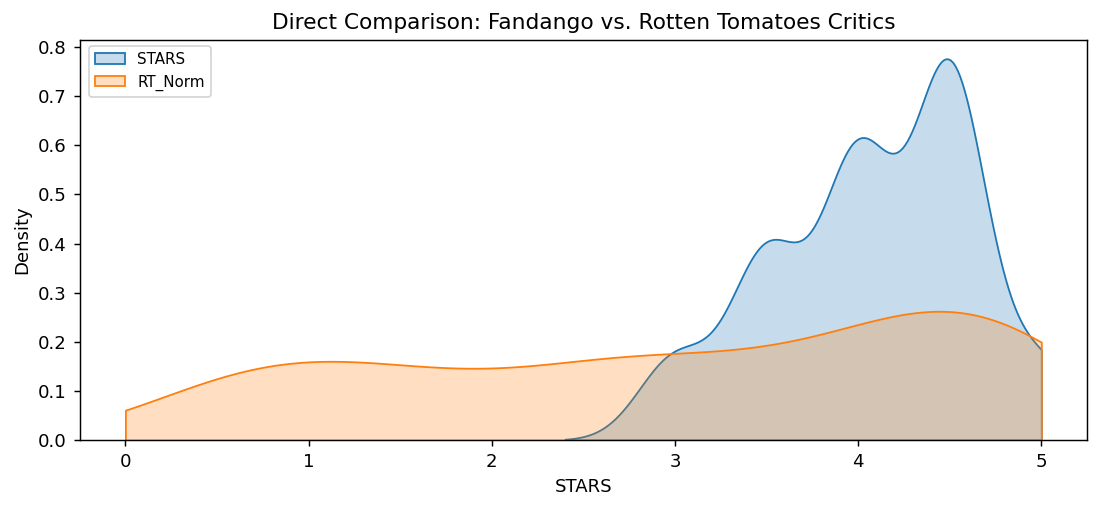

In [43]:
fig = plt.figure(figsize=(10,4),dpi=130)
sns.kdeplot(x='STARS',data=norm_scores,fill=True,clip=[0,5],label='STARS')
sns.kdeplot(x='RT_Norm',data=norm_scores,fill=True,clip=[0,5],label='RT_Norm')
fig.legend(loc=(0.081,0.81),fontsize='small')
plt.title("Direct Comparison: Fandango vs. Rotten Tomatoes Critics")
plt.show()

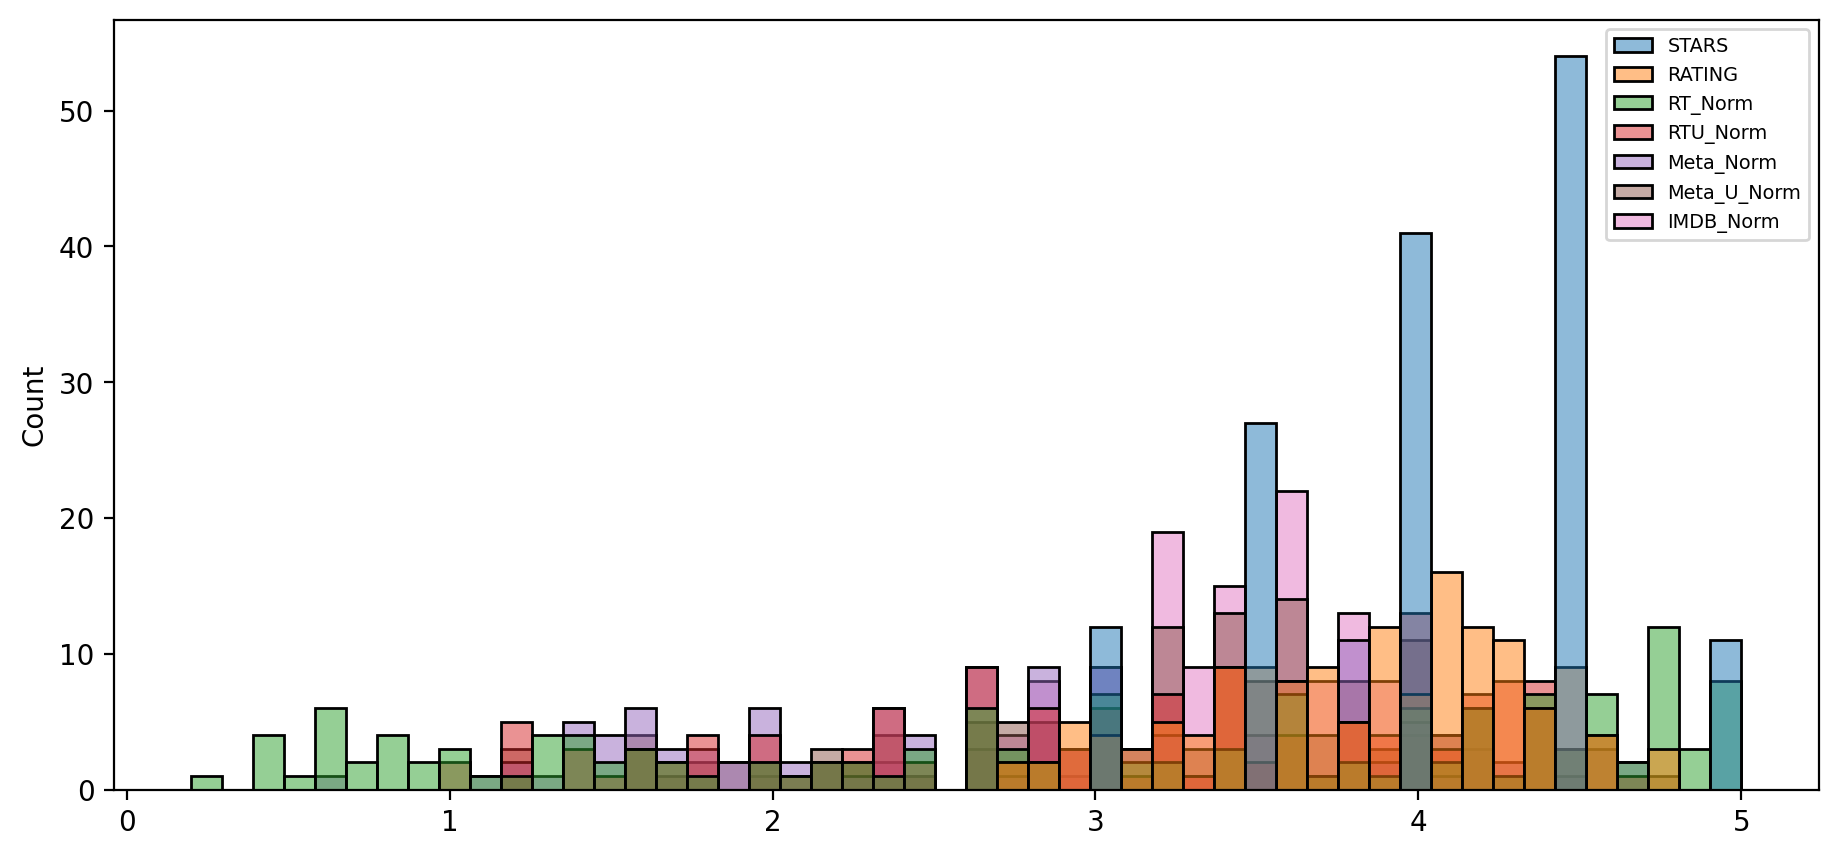

In [44]:
fig = plt.figure(figsize=(11,5),dpi=200)
ax = sns.histplot(data=norm_scores,bins=50)
sns.move_legend(ax, "upper right",fontsize='x-small')

## 6. Correlation Analysis
We calculate the correlation between the sites to see which rating systems agree with each other. A lower correlation suggests a site is measuring something different (or is biased).

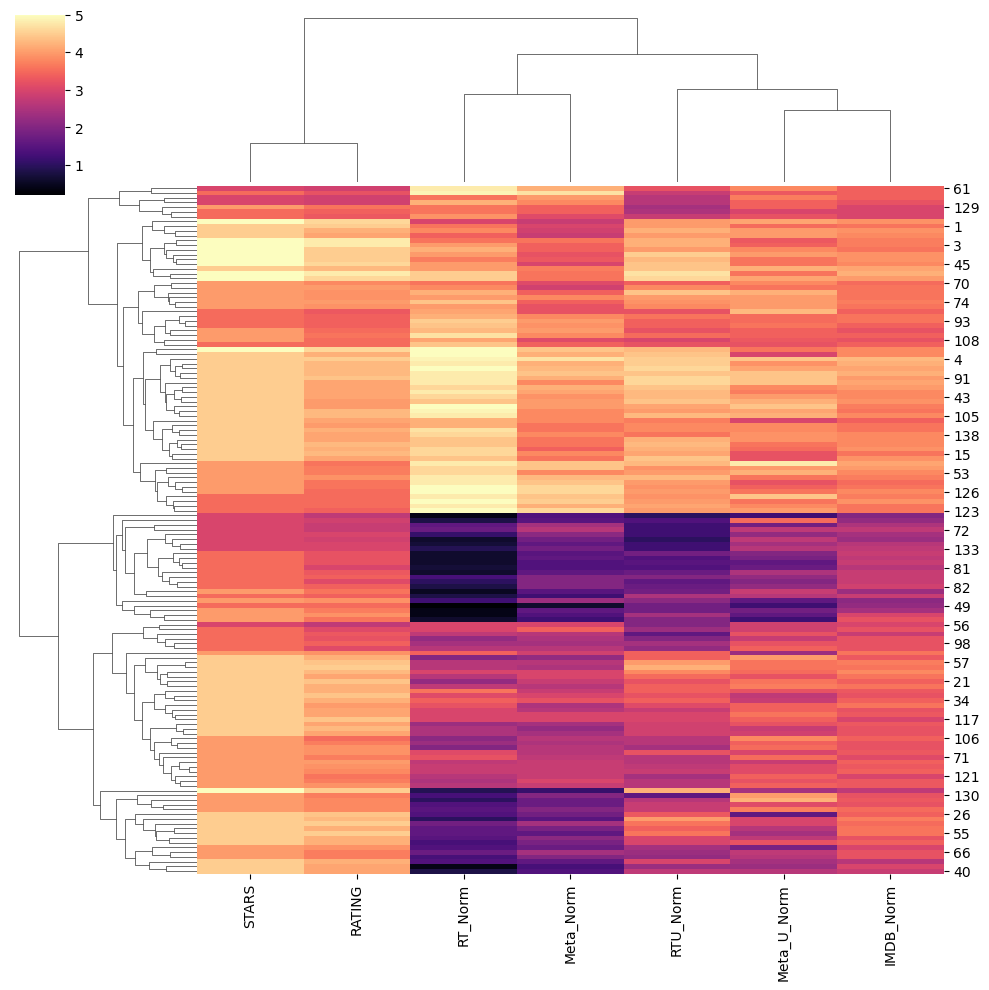

In [45]:
sns.clustermap(norm_scores,cmap='magma')

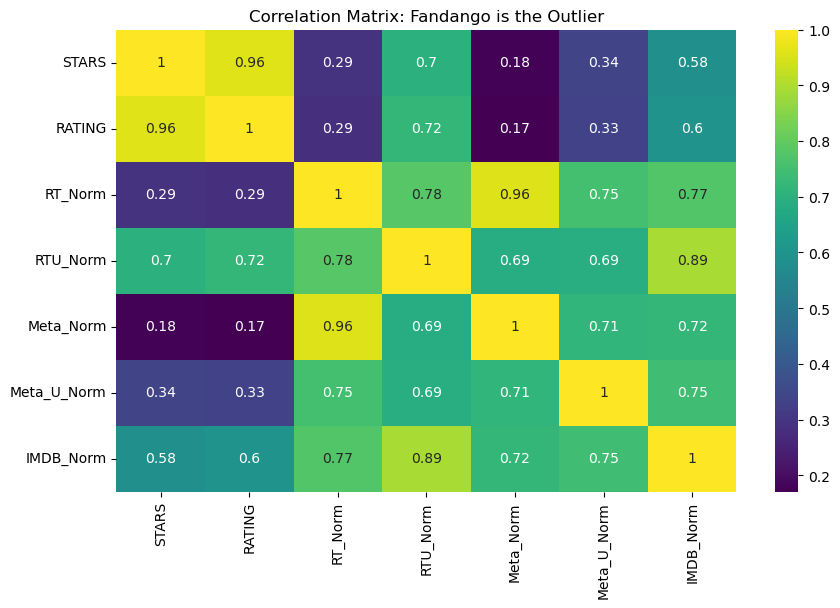

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(data=norm_scores.corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix: Fandango is the Outlier")
plt.show()

In [47]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


C:\Users\hp\AppData\Local\Temp\ipykernel_25556\3938044601.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set2')


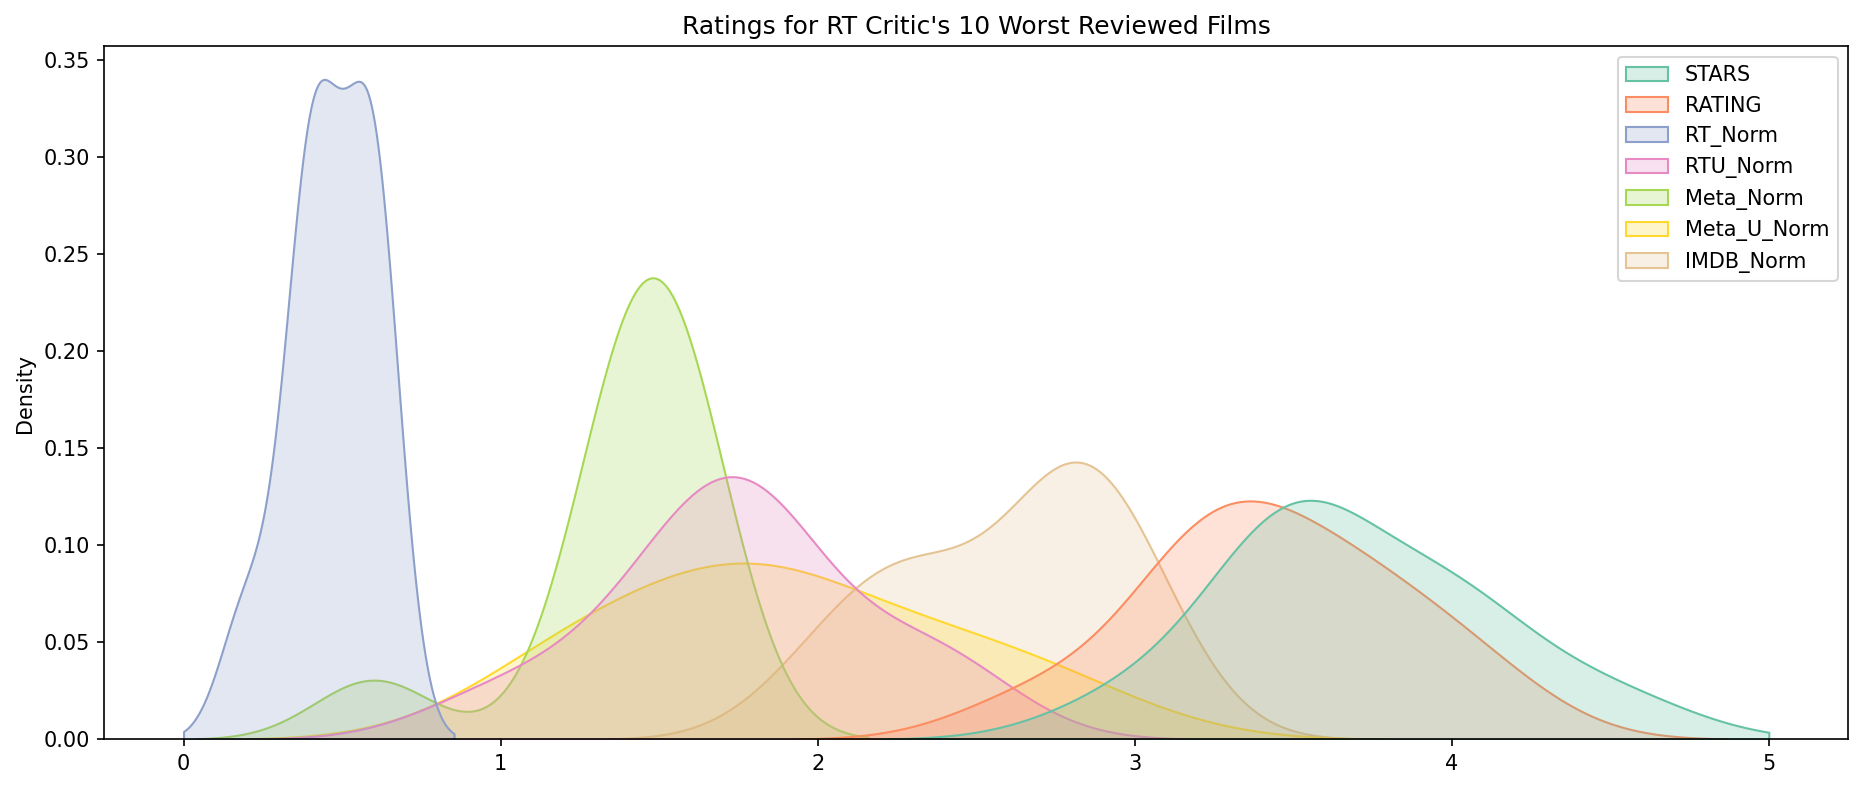

In [48]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set2')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

# Conclusion

Based on this analysis, we have found strong evidence that Fandango's movie ratings in 2015 were significantly inflated.

**Key Findings:**
1.  **The "Rounding" Bias:** Fandango consistently rounds ratings **up** to the nearest half-star. We found no instances where a rating was rounded down. This artificially boosts the visible score of movies.
2.  **Distribution Skew:** The Fandango rating distribution is heavily left-skewed, with almost no movies receiving below 3 stars. In contrast, Rotten Tomatoes and Metacritic show a much wider, more natural distribution of scores.
3.  **Disagreement on "Bad" Movies:** Fandango disagrees most strongly with critics on poor-quality movies. For the 10 worst-rated movies by Rotten Tomatoes (scores < 20%), Fandango still displayed an average rating of ~3-4 stars.

**Verdict:** Fandango's rating system separates itself from industry standards by putting a "safety floor" on ratings, ensuring that even poor movies appear to be "decent" (3+ stars) to potential ticket buyers.